In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, BatchNormalization, ZeroPadding2D, MaxPooling2D, \
        Activation, add
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing.image import ImageDataGenerator

from glob import glob
import itertools

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [4]:
IMAGE_SIZE = [128, 128]

epochs = 16
batch_size = 128

In [5]:
folder_paths = ["/kaggle/input/alzheimer-mri-dataset/Dataset/Mild_Demented/",
             "/kaggle/input/alzheimer-mri-dataset/Dataset/Moderate_Demented/",
             "/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/",
             "/kaggle/input/alzheimer-mri-dataset/Dataset/Very_Mild_Demented/"]


In [6]:
source_folders = ["Mild_Demented", "Moderate_Demented", "Non_Demented", "Very_Mild_Demented"]
train_folders = ["/kaggle/working/Train/Mild_Demented", "/kaggle/working/Train/Moderate_Demented", "/kaggle/working/Train/Non_Demented", "/kaggle/working/Train/Very_Mild_Demented"]
test_folders = ["/kaggle/working/Test/Mild_Demented", "/kaggle/working/Test/Moderate_Demented", "/kaggle/working/Test/Non_Demented", "/kaggle/working/Test/Very_Mild_Demented"]

In [7]:
import os

for folder in train_folders:
    if not(os.path.exists(folder)):
        os.makedirs(folder)
        print(f"Directory created: {folder}")
for folder in test_folders:
    if not(os.path.exists(folder)):
        os.makedirs(folder)
        print(f"Directory created: {folder}")

Directory created: /kaggle/working/Train/Mild_Demented
Directory created: /kaggle/working/Train/Moderate_Demented
Directory created: /kaggle/working/Train/Non_Demented
Directory created: /kaggle/working/Train/Very_Mild_Demented
Directory created: /kaggle/working/Test/Mild_Demented
Directory created: /kaggle/working/Test/Moderate_Demented
Directory created: /kaggle/working/Test/Non_Demented
Directory created: /kaggle/working/Test/Very_Mild_Demented


In [ ]:
import os
import random
import shutil

split_ratio = 0.8

for folder_idx, folder_name in enumerate(folder_paths):
    file_list = os.listdir(folder_name)
    image_files = [file for file in file_list if file.lower().endswith(".jpg")]

    random.shuffle(image_files)

    split_index = int(len(image_files) * split_ratio)

    train_images = image_files[:split_index]
    test_images = image_files[split_index:]
    
    print(len(train_images))
    print(len(test_images))
    print(folder_name)
    # print(train_images)
    
    for image in train_images:
        src_path = os.path.join(folder_name, image)
        dst_path = os.path.join(train_folders[folder_idx], image)
        shutil.copy(src_path, dst_path)
        
        #applyPreProcessing(dst_path)
        
        #print("source path:", src_path)
        print("dst path:", dst_path)
        
    for image in test_images:
        src_path = os.path.join(folder_name, image)
        dst_path = os.path.join(test_folders[folder_idx], image)
        shutil.copy(src_path, dst_path)
        #print("source path:", src_path)
        print("dst path:", dst_path)
        
    


In [9]:
from glob import glob

train_path = "/kaggle/working/Train/"
test_path = "/kaggle/working/Test/"

train_image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(test_path + '/*/*.jp*g')

print(len(train_image_files))
print(len(valid_image_files))

5119
1281


In [10]:
folders = glob(train_path + '/*')
print(folders)
print(len(folders))

['/kaggle/working/Train/Mild_Demented', '/kaggle/working/Train/Non_Demented', '/kaggle/working/Train/Very_Mild_Demented', '/kaggle/working/Train/Moderate_Demented']
4


(128, 128)


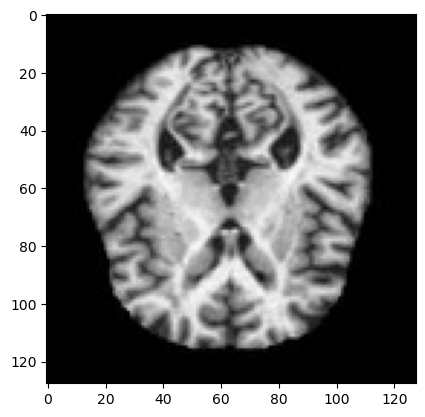

In [11]:
plt.imshow(keras_image.load_img(np.random.choice(valid_image_files)))
print(keras_image.load_img(np.random.choice(valid_image_files)).size)

In [13]:
def applyLaplacianFiltering(image_path):
    
    f = cv2.imread(image_path, 0)
    
    kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])
    
    LaplacianImage = cv2.filter2D(src=f, 
                              ddepth=-1, 
                              kernel=kernel)
    
    c = -1
    g = f + c*LaplacianImage

    gClip = np.clip(g, 0, 127)
    
    return gClip

In [ ]:
import cv2

source_folders = ["Mild_Demented", "Moderate_Demented", "Non_Demented", "Very_Mild_Demented"]
train_folders = ["/kaggle/working/Train/Mild_Demented", "/kaggle/working/Train/Moderate_Demented", "/kaggle/working/Train/Non_Demented", "/kaggle/working/Train/Very_Mild_Demented"]
test_folders = ["/kaggle/working/Test/Mild_Demented", "/kaggle/working/Test/Moderate_Demented", "/kaggle/working/Test/Non_Demented", "/kaggle/working/Test/Very_Mild_Demented"]

def applyPreProcessing():
    train_path = "/kaggle/working/Train/"
    test_path = "/kaggle/working/Test/"
    paths = [train_path, test_path]
    jpg_files = []
    
    for folderidx, folderPath in enumerate(train_folders):
        file_pattern = os.path.join(folderPath, "*.jpg")
        jpg_files = glob(file_pattern)
        #print(jpg_files)
        
        if(folderidx == 1):
            break
    
    test_image = jpg_files[0]
    print(type(test_image))
    
    
    plt.imshow(keras_image.load_img(jpg_files[0]))
    plt.axis('off')
    plt.show()
      
    
    processed_image = applyLaplacianFiltering(test_image)
    print(type(processed_image))
    processed_image = cv2.imencode('.jpg', processed_image)
    jpg_files[0] = processed_image
    
    # processed_image = takeSobelGradient(processed_image)
    
    
    plt.imshow(keras_image.load_img(jpg_files[0]), cmap='gray')
    plt.axis('off')
    plt.show()
    
    
applyPreProcessing()

<class 'str'>


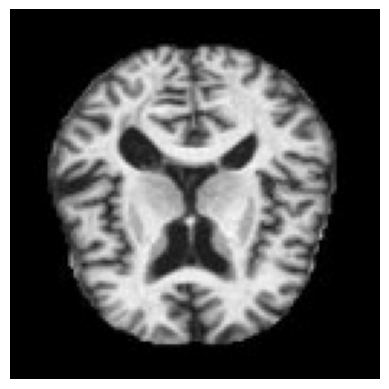

In [15]:
import cv2

source_folders = ["Mild_Demented", "Moderate_Demented", "Non_Demented", "Very_Mild_Demented"]
train_folders = ["/kaggle/working/Train/Mild_Demented", "/kaggle/working/Train/Moderate_Demented", "/kaggle/working/Train/Non_Demented", "/kaggle/working/Train/Very_Mild_Demented"]
test_folders = ["/kaggle/working/Test/Mild_Demented", "/kaggle/working/Test/Moderate_Demented", "/kaggle/working/Test/Non_Demented", "/kaggle/working/Test/Very_Mild_Demented"]

def applyPreProcessing():
    train_path = "/kaggle/working/Train/"
    test_path = "/kaggle/working/Test/"
    paths = [train_path, test_path]
    jpg_files = []
    
    for folderidx, folderPath in enumerate(train_folders):
        file_pattern = os.path.join(folderPath, "*.jpg")
        jpg_files = glob(file_pattern)
        #print(jpg_files)
        
        if(folderidx == 1):
            break
    
    test_image = jpg_files[0]
    print(type(test_image))
    
    
    plt.imshow(keras_image.load_img(jpg_files[0]))
    plt.axis('off')
    plt.show()
      
    """
    processed_image = applyLaplacianFiltering(test_image)
    print(type(test_image))
    processed_image = cv2.imencode('.jpg', processed_image)
    jpg_files[0] = processed_image
    
    # processed_image = takeSobelGradient(processed_image)
    
    
    plt.imshow(keras_image.load_img(jpg_files[0]), cmap='gray')
    plt.axis('off')
    plt.show()
    """
    
applyPreProcessing()

In [16]:
import cv2
def  takeSobelGradient(image_path):
    image = cv2.imread(image_path, 0)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    ksize = 3
    
    gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
    gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)
    
    gX = cv2.convertScaleAbs(gX)
    gY = cv2.convertScaleAbs(gY)
    
    # combine the gradient representations into a single image
    combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
    # show our output images
    
    cv2.imshow("Sobel/Scharr X", gX)
    cv2.imshow("Sobel/Scharr Y", gY)
    cv2.imshow("Sobel/Scharr Combined", combined)
    cv2.waitKey(0)
    
    return combined

In [17]:
def convertNumpArray (numpyArrayImage):
    numpyArrayImage[:,:,0] = numpy.ones([5,5])*64/255.0
    numpyArrayImage[:,:,1] = numpy.ones([5,5])*128/255.0
    numpyArrayImage[:,:,2] = numpy.ones([5,5])*192/255.0

    cv2.imwrite('color_img.jpg', img)
    cv2.imshow("image", img)
    cv2.waitKey()

In [ ]:
def identity_block(input_, kernel_size, filters):
    f1, f2, f3 = filters
    
    x = Conv2D(f1, (1,1))(input_)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(f2, kernel_size, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(f3, (1,1))(x)
    x = BatchNormalization()(x)
    
    x = add([x, input_])
    x = Activation('relu')(x)
    return x

In [ ]:
def conv_block(input_, kernel_size, filters, strides = (2, 2)):
    f1, f2, f3 = filters
    
    x = Conv2D(f1, (1, 1), strides = strides)(input_)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(f2, kernel_size, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(f3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    shortcut = Conv2D(f3, (1, 1), strides = strides)(input_)
    shortcut = BatchNormalization()(shortcut)
    
    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
i = Input (shape = IMAGE_SIZE + [3])
x = ZeroPadding2D(padding = (3, 3))(i)
x = Conv2D(64, (7, 7), strides = (2, 2), padding = 'valid')(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding = (1, 1))(x)
x = MaxPooling2D((3, 3), strides = (2, 2))(x)

x = conv_block(x, 3, [64, 64, 256], strides = (1, 1))
x = identity_block(x, 3, [64, 64, 256])
x = identity_block(x, 3, [64, 64, 256])

x = conv_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])

In [ ]:
x = Flatten()(x)
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
model = Model(inputs = i, outputs = prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate = 0.0001),
    metrics = ['accuracy']
)

In [ ]:
def preprocessingFunctionTester():
    #plt.imshow(keras_image.load_img(np.random.choice(valid_image_files)))
    print(keras_image.load_img(np.random.choice(valid_image_files)).size)
    
    plt.figure(dpi=150)
    print(type(np.asarray(keras_image.load_img(np.random.choice(valid_image_files)))))
    
    mutable_array = np.asarray(keras_image.load_img(np.random.choice(valid_image_files))).copy()
    mutable_array.flags.writeable = True
    
    returned_value = normalizeColorDims(mutable_array)
    returned_value = applyLaplacianFilter(returned_value)
    
    #print(returned_value)
    im = Image.fromarray(numpy.uint8(returned_value))
    
    plt.imshow(np.log1p(np.abs(returned_value)))
    plt.show()
    
preprocessingFunctionTester()

In [19]:
def normalizeColorDims(x):
    print(type(x))
    x = x / 127.5
    #x -= 1. 
    return x

In [20]:
train_gen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = normalizeColorDims
)

val_gen = ImageDataGenerator(
    preprocessing_function = normalizeColorDims
)

In [21]:
test_gen = val_gen.flow_from_directory(test_path, target_size = IMAGE_SIZE, class_mode = 'sparse')
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
    labels[v] = k

Found 1281 images belonging to 4 classes.
{'Mild_Demented': 0, 'Moderate_Demented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}


In [ ]:
for x, y in test_gen:
    print("min:", x[1].min(), "max:", x[1].max())
    plt.title(labels[np.argmax(y[1])])
    plt.imshow(x[1])
    plt.show()
    print(x[1].size)
    break

In [ ]:
# Clear output folder
"""
import os

def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

folder_path = '/kaggle/working'
remove_folder_contents(folder_path)
os.rmdir(folder_path)
"""

In [ ]:
# Not working laplacian frequency domain filter code
"""
def applyLaplacianFiltering():
    train_path = "/kaggle/working/Train/"
    test_path = "/kaggle/working/Test/"
    paths = [train_path, test_path]
    jpg_files = []
    
    for folderidx, folderPath in enumerate(train_folders):
        file_pattern = os.path.join(folderPath, "*.jpg")
        jpg_files = glob(file_pattern)
        #print(jpg_files)
        
        if(folderidx == 1):
            break
    
    plt.figure(dpi=100)
    f = cv2.imread(jpg_files[0], 0)
    #plt.imshow(f, cmap='gray')
    #plt.show()
    
    # getting into frequency domain
    
    frequency_domain_of_image = np.fft.fftshift(np.fft.fft2(f))
    
    #plt.imshow(np.log1p(np.abs(F)), cmap='gray')
    #plt.show()
    
    # Laplacian Filter
    P, Q = frequency_domain_of_image.shape
    
    print(P, Q)
    laplacian_filter = np.zeros((P,Q), dtype=np.float32)
    for u in range(P):
        for v in range(Q):
            laplacian_filter[u,v]= -4*np.pi*np.pi*((u-P/2)**2 + (v-Q/2)**2)
            
    # Laplacian Image
    laplacian_image = laplacian_filter * frequency_domain_of_image
    laplacian_image = np.fft.ifftshift(laplacian_image)
    laplacian_image = np.real(np.fft.ifft2(laplacian_image))
    
    plt.imshow(laplacian_image, cmap='gray')
    plt.show()
    
    # Scale laplacian image between -1 and 1
    old_range = np.max(laplacian_image) - np.min(laplacian_image)
    new_range = 1 - -1
    scaled_laplacian_image = (((laplacian_image - np.min(laplacian_image)) * new_range) / old_range) + -1
    
    plt.imshow(scaled_laplacian_image, cmap='gray')
    plt.show()
    
    c = -1
    laplacian_applied_image = f + c * scaled_laplacian_image
    
    
    plt.imshow(f, cmap='gray')
    plt.show()
    
    plt.imshow(laplacian_applied_image, cmap='gray')
    plt.show()
    
applyLaplacianFiltering()
"""